<a href="https://colab.research.google.com/github/ByeongYeonYoon/2023.AI/blob/main/ex03_multivariable_linearregression_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [실습03] 다항 선형 회귀

### 1. 집값 데이터 읽기

In [3]:
import numpy as np

# (집 크기(피트제곱)), (방개수(개)), (가격(달러))
# Ng, Machine Learning, Coursera, ml-ex 중
import pandas as pd
data = pd.read_csv('house_price_us.txt', names=['size', 'n_room', 'price'])
print (data)

X = np.c_[data['size'], data['n_room']] # 제곱피트(ft^2)
y = data['price'] # $ 달러
m = len(data) #정보 개수(행 개수)

    size  n_room   price
0   2104       3  399900
1   1600       3  329900
2   2400       3  369000
3   1416       2  232000
4   3000       4  539900
5   1985       4  299900
6   1534       3  314900
7   1427       3  198999
8   1380       3  212000
9   1494       3  242500
10  1940       4  239999
11  2000       3  347000
12  1890       3  329999
13  4478       5  699900
14  1268       3  259900
15  2300       4  449900
16  1320       2  299900
17  1236       3  199900
18  2609       4  499998
19  3031       4  599000
20  1767       3  252900
21  1888       2  255000
22  1604       3  242900
23  1962       4  259900
24  3890       3  573900
25  1100       3  249900
26  1458       3  464500
27  2526       3  469000
28  2200       3  475000
29  2637       3  299900
30  1839       2  349900
31  1000       1  169900
32  2040       4  314900
33  3137       3  579900
34  1811       4  285900
35  1437       3  249900
36  1239       3  229900
37  2132       4  345000
38  4215       4  549000


In [4]:
# numpy array 형태로 변환, 형태 변환(m) -> (m,1)
X = (np.array(X)).reshape(m,2)
y = (np.array(y)).reshape(m,1)
print (X.shape, y.shape)

(47, 2) (47, 1)


### 2. 그래프 그리기

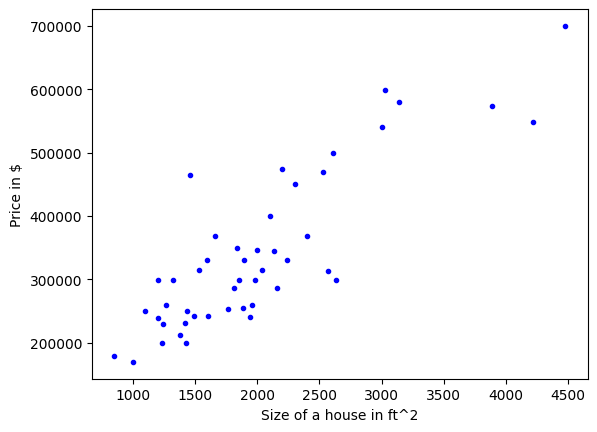

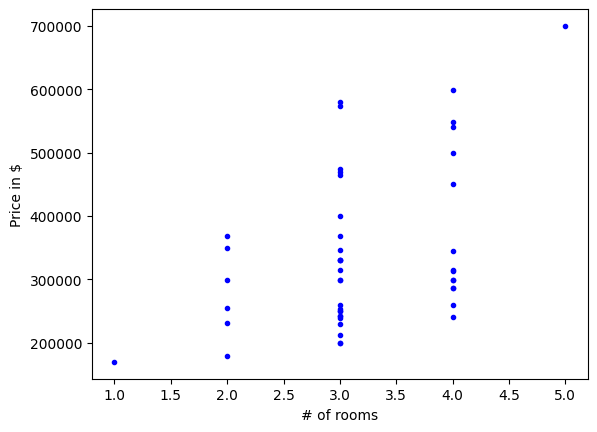

In [5]:
import matplotlib.pyplot as plt
plt.plot(X[:,0].reshape(-1), y, 'b.') # X[:,0].reshape(-1): 한 줄로 파기. (47.)->(47)
plt.xlabel("Size of a house in ft^2")  # 집 크기(제곱피트)
plt.ylabel("Price in $")  # 매매가(달러)
plt.show()

plt.plot(X[:,1].reshape(-1), y, 'b.') 
plt.xlabel("# of rooms")  # 방 개수
plt.ylabel("Price in $")  # 매매가(달러)
plt.show()

### 3. Feature scaling(normalization)
### x_i = \frac{x_i-\u_i}{s_i} $

In [6]:
def featureNormalize(X): # X(47,2)
    # 1. 각 feature 의 평균, 표준편차 계산
    mu = np.mean(X, axis=0) # (47,2) -> (1,2)
    std = np.std(X, axis=0) # (47,2) -> (1,2)

    # 1. (각 값 - 평균)/ 표준편차
    X_norm = (X -mu) / std

    return X_norm, mu, std

In [7]:
X, mu, std = featureNormalize(X)
print (X.shape)

(47, 2)


### 4. Gradient descent -> theta

In [8]:
X_b = np.c_[np.ones((m, 1)), X]  # 모든 샘플에 x0=1을 추가
# c_ : concentration. 배열을 옆으로 붙이기

learning_rate = 0.01  # 학습률(learning rate)
n_iter = 400

theta = np.random.randn(3,1)   # 무작위 초기화
gradients = np.zeros((3,1))

for i in range(n_iter): 
    gradients = 2.0/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
print ("theta:")
print (theta)

theta:
[[340307.35790189]
 [107757.44002736]
 [ -4888.31908543]]


### 5. 임의의 집 크기(x_my)에 대한 집값 예측하기

In [9]:
X_mine = np.array([[890,2]])  # 우리집이 25평이라면, 얼마일까? 25평 -> 890 피트제곱 (ft^2)
X_mine = (X_mine - mu) / std   # feature normalization
print (X_mine)

X_mine_b = np.c_[np.ones((1,1)), X_mine]  # 모든 샘플에 x0=1을 추가
y_predict = X_mine_b.dot(theta)
print (y_predict, "달러")

[[-1.41271579 -1.5543919 ]]
[[195675.08483929]] 달러


### 6. (Optional) 반복 횟수에 따른 비용함수 J(theta) 그리기

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def ComputeJ(t0, t1, t2, X, y):
  m = len(X)
  X_b = np.c_[np.ones((m, 1)), X]   # 모든 샘플에 x0=1 추가
  theta = np.array([t0, t1, t2])

  cost_vector = X_b.dot(theta) - y   # (52,1)

  cost_vector.reshape(-1)
  # 각 원소 제곱
  cost2 = np.square(cost_vector)
  # 원소들 더하기
  cost_sum = np.sum(cost2) / (2*m)

  return cost_sum

In [12]:
X = np.c_[data['size'], data['n_room']]   # 제곱피트
y = data['price']   #$(달러)
m = len(data)   # 정보 개수(행 개수)

# nimpy array 형태로 변환, 형태 변환(m) -> (m,1)
X = (np.array(X)).reshape(m,2)
y = (np.array(y)).reshape(m,1)
print (X.shape, y.shape)

# feature normalization
X, mu, std = featureNormalize(X)
print (X.shape)

(47, 2) (47, 1)
(47, 2)


In [13]:
X_b = np.c_[np.ones((m, 1)), X]   # 모든 샘플에 x0=1 추가
# c_ : concentration. 배열을 옆으로 붙이기

learning_rate = 0.01  # 학습률(learning rate)
n_iter = 400

theta = np.random.randn(3,1)   # 무작위 초기화
gradients = np.zeros((3,1))

itr_arr=[]
cost_arr=[]
for i in range(n_iter): 
    gradients = 2.0/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

    cost = ComputeJ(theta[0], theta[1], theta[2], X, y)
    cost_arr.append(cost)
    itr_arr.append(i)
print ("theta:")
print (theta)

theta:
[[340307.35741375]
 [107757.42308796]
 [ -4888.3021392 ]]


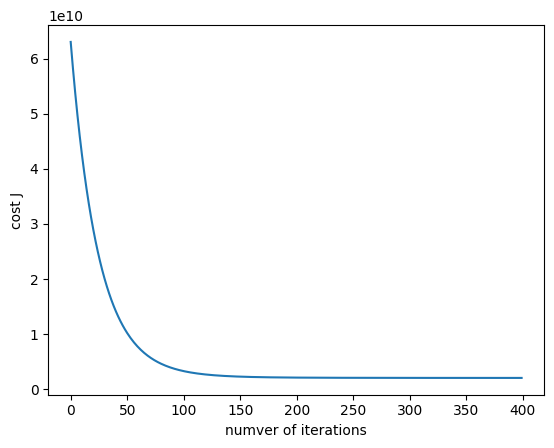

In [14]:
plt.plot(itr_arr, cost_arr)
plt.xlabel("numver of iterations")
plt.ylabel("cost J")
plt.show()